## Try plotting real-time SMAP L2C


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import copy

import cartopy.crs as ccrs                   # import projections
from cartopy.io.shapereader import Reader
import cartopy
import gsw
import functions  # requires functions.py from this repository
import datetime

import sys
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/tools') #github repo in NASA_SMODE organization
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/data-synthesis/')
# from mapping_tools import *
# from tools import *

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600
#plt.close('all')

%matplotlib inline
%matplotlib widget
# %matplotlib qt5

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [ ]:
f = gsw.geostrophy.f(37)
inertial_period = 2*np.pi/f/3600
print('Inertial period is '+ f'{inertial_period:.1f}' + ' hours')

Inertial period is 19.9 hours


In [6]:
# 2023 IOP2
pth = '../data/external/SMAP_L2C_NRT/'
file = pth+'RSS_SMAP_SSS_L2C_r43831_20230416T123314_2023106_NRT_V05.0_002.nc'; V = [30, 35]; zoom = 1



In [8]:
ds = xr.open_dataset(file,decode_times=False)

In [9]:
ds

<xarray.Dataset>
Dimensions:                 (ydim_grid: 720, xdim_grid: 1560, look: 2, polarization_2: 2, polarization_4: 4, polarization_3: 3, iceflag_components: 3, uncertainty_components: 9)
Dimensions without coordinates: ydim_grid, xdim_grid, look, polarization_2, polarization_4, polarization_3, iceflag_components, uncertainty_components
Data variables: (12/56)
    time                    (ydim_grid, xdim_grid, look) float64 ...
    cellat                  (ydim_grid, xdim_grid, look) float32 ...
    cellon                  (ydim_grid, xdim_grid, look) float32 ...
    gland                   (ydim_grid, xdim_grid, look) float32 ...
    fland                   (ydim_grid, xdim_grid, look) float32 ...
    surtep                  (ydim_grid, xdim_grid) float32 ...
    ...                      ...
    pratot_exp              (ydim_grid, xdim_grid, look) float32 ...
    TEC                     (ydim_grid, xdim_grid, look) float32 ...
    sss_smap_unc            (ydim_grid, xdim_grid, look) float32 ...
    sss_smap_40km_unc       (ydim_grid, xdim_grid, look) float32 ...
    sss_smap_unc_comp       (uncertainty_components, ydim_grid, xdim_grid, look) float32 ...
    sss_smap_40km_unc_comp  (uncertainty_components, ydim_grid, xdim_grid, look) float32 ...
Attributes: (12/104)
    Conventions:                                        CF-1.7, ACDD-1.3
    title:                                              SMAP ocean surface sa...
    version:                                            V5.0 Validated Release
    summary:                                            The dataset contains ...
    acknowledgement:                                    Funded under Subcontr...
    processing_level:                                   L2C
    ...                                                 ...
    ta_ocean_ave_vpol:                                  109.19065
    ta_ocean_ave_hpol:                                  76.31231
    ta_bias_ocean_vpol:                                 -1.0286499
    ta_bias_ocean_hpol:                                 -0.93316776
    ta_bias_ocean_S3:                                   0.22
    ta_bias_ocean_S4:                                   -0.43

In [13]:
ds.sss_smap_40km[:,:,1].squeeze().plot()

ValueError: x and y can be no greater than 2D, but have shapes (720,) and (720, 1560, 2)

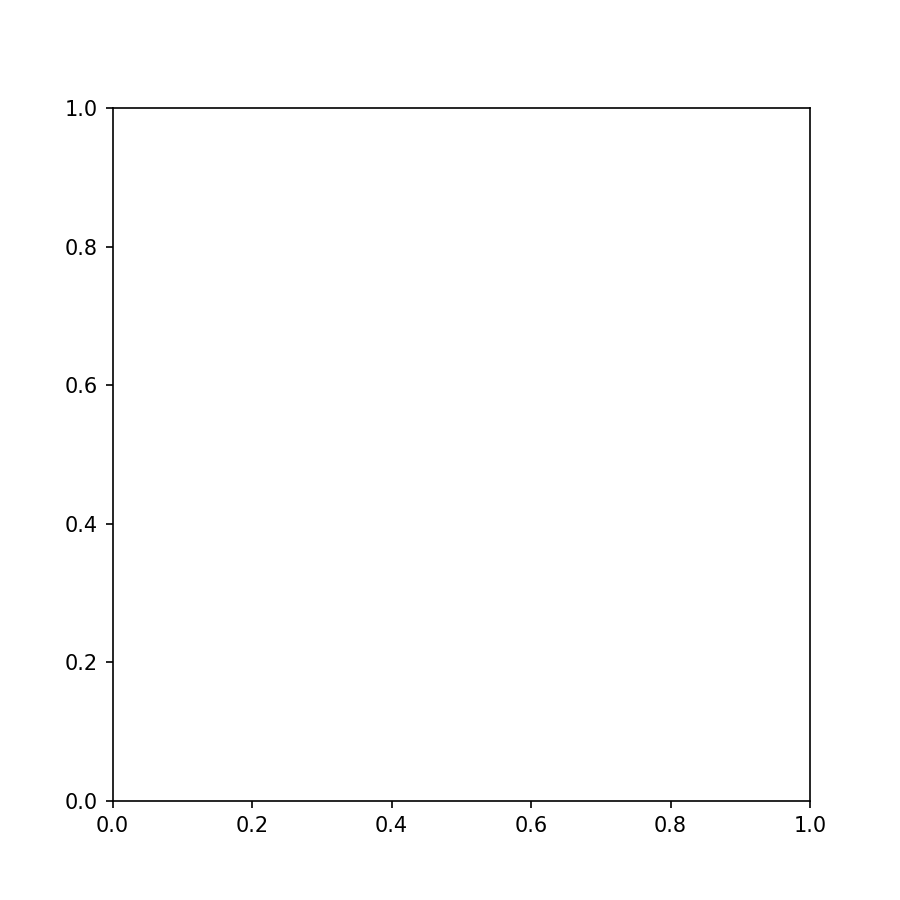

In [28]:
plt.figure()
plt.plot(np.isnan(ds.cellon))

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

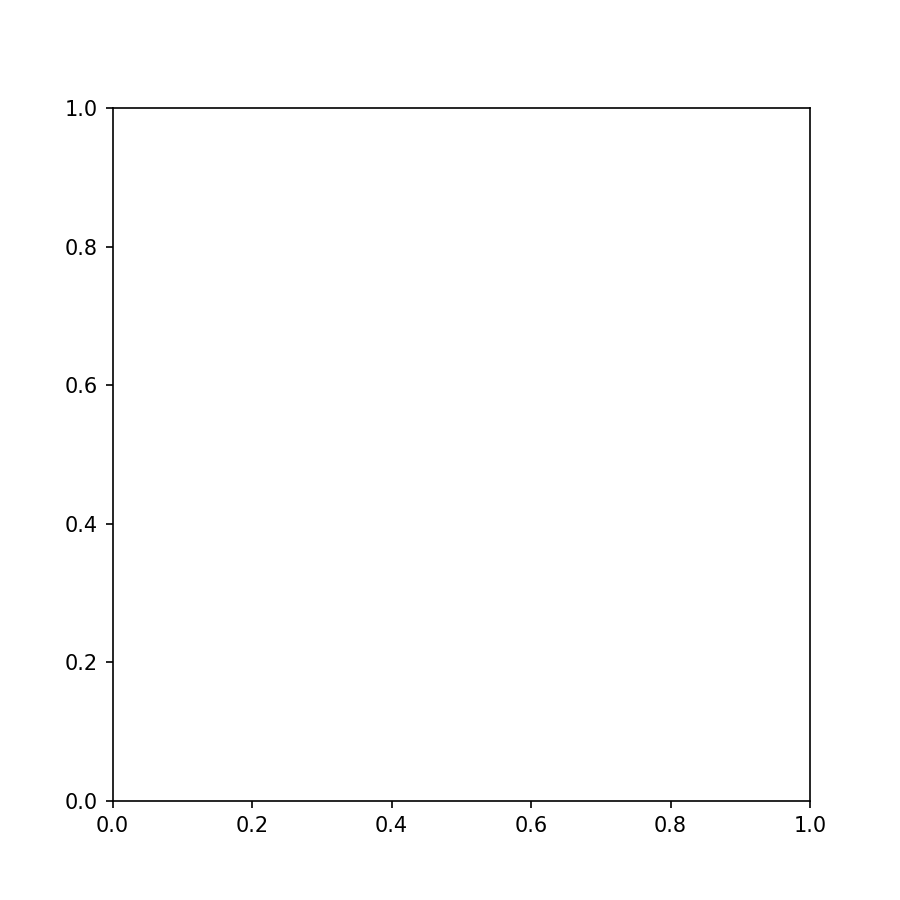

In [26]:
plt.figure()
# ds.sss_smap[:,:,1].plot()
plt.pcolormesh(ds.cellon[:,:,1],ds.cellat[:,:,1],ds.sss_smap[:,:,1])

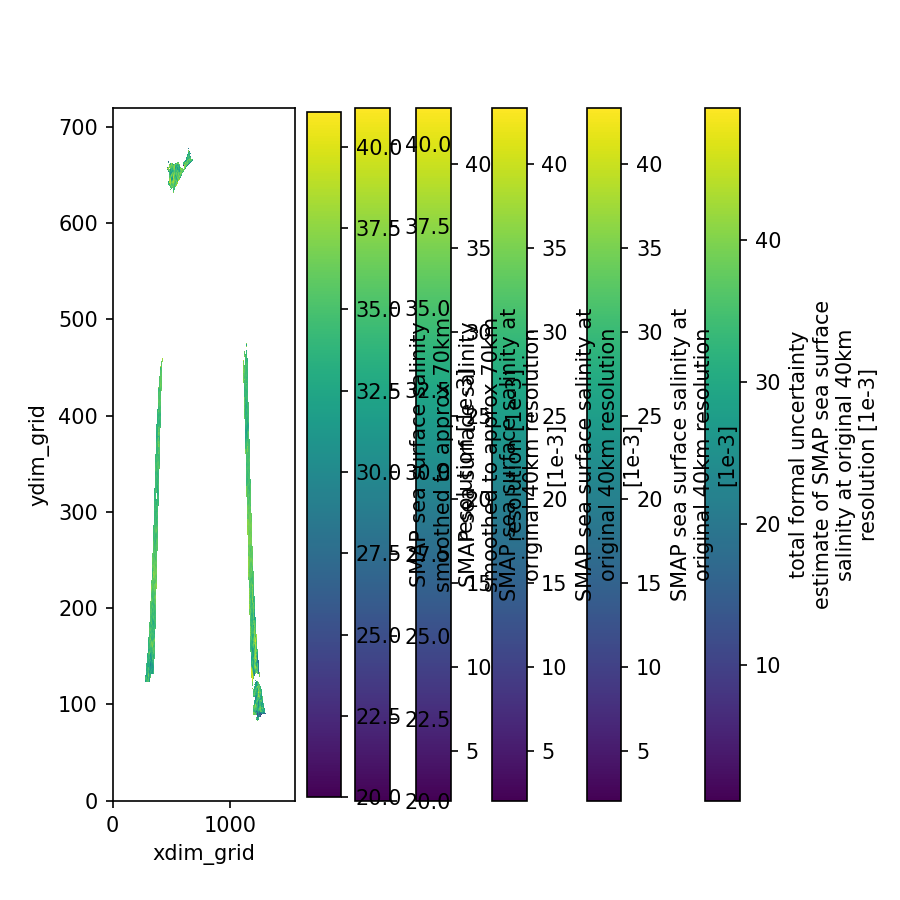

In [22]:
plt.show()